<a href="https://colab.research.google.com/github/Iryna-Lytvynchuk/Data_Science/blob/main/fashion_mnist_11hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
from tensorflow import keras
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics
from keras import regularizers
from tensorflow.keras.utils import to_categorical

In [41]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [42]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [43]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [44]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), kernel_regularizer = regularizers.l2(0.001), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), kernel_regularizer = regularizers.l2(0.001), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), kernel_regularizer = regularizers.l2(0.001), activation="relu"),

    layers.Flatten(),
    layers.Dense(64, kernel_regularizer = regularizers.l2(0.001), activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 flatten_10 (Flatten)        (None, 1152)            

In [46]:
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2, batch_size=64)

results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/20
750/750 [==============================] - 44s 58ms/step - loss: 0.7503 - accuracy: 0.7764 - val_loss: 0.5668 - val_accuracy: 0.8464
Epoch 2/20
750/750 [==============================] - 44s 58ms/step - loss: 0.5229 - accuracy: 0.8562 - val_loss: 0.5220 - val_accuracy: 0.8479
Epoch 3/20
750/750 [==============================] - 44s 58ms/step - loss: 0.4761 - accuracy: 0.8704 - val_loss: 0.4881 - val_accuracy: 0.8675
Epoch 4/20
750/750 [==============================] - 43s 58ms/step - loss: 0.4441 - accuracy: 0.8783 - val_loss: 0.4750 - val_accuracy: 0.8681
Epoch 5/20
750/750 [==============================] - 43s 58ms/step - loss: 0.4249 - accuracy: 0.8849 - val_loss: 0.4614 - val_accuracy: 0.8729
Epoch 6/20
750/750 [==============================] - 43s 58ms/step - loss: 0.4123 - accuracy: 0.8884 - val_loss: 0.4320 - val_accuracy: 0.8817
Epoch 7/20
750/750 [==============================] - 43s 58ms/step - loss: 0.4016 - accuracy: 0.8920 - val_loss: 0.4259 - val_accuracy:

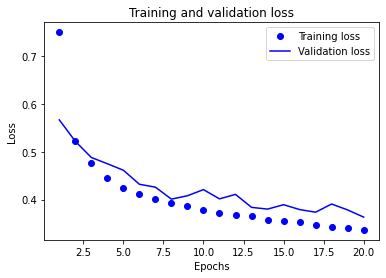

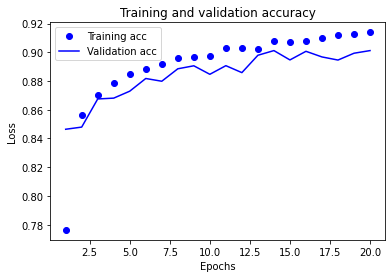

In [47]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()